In [1]:
# import relevant modules 
import os
import sys
from importlib import reload
import numpy as np

# locate directory containing scripts 
current_directory = os.getcwd() 
data_directory = os.path.dirname(current_directory) + '/data'
src_directory = os.path.dirname(current_directory) + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain, VTA_analytics

# reload custom modules
reload(spin_chain)
reload(VTA_analytics);

from spin_chain import properties, symmetry_eigvecs
from VTA_analytics import sweep_spectra

$\Large \text{Collect Spin Chain Parameters}$

In [2]:
# specify parameters for spin chain (number of sites, coupling constants, 
# periodic or non-periodic boundary conditions,  and tolerance 
# with which to determine ground state energy
N_qubits = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9

# collect properties of spin chain
H4, H4_list, eigenstates, eigenvalues, E0, ρ_ground_state = \
    properties(N_qubits, Jx, Jy, Jz, periodic_bc, tolerance)

# compute symmetry eigevectors 
P, eigvecs, ρ_list = symmetry_eigvecs(N_qubits, Jx, Jy, Jz, periodic_bc)

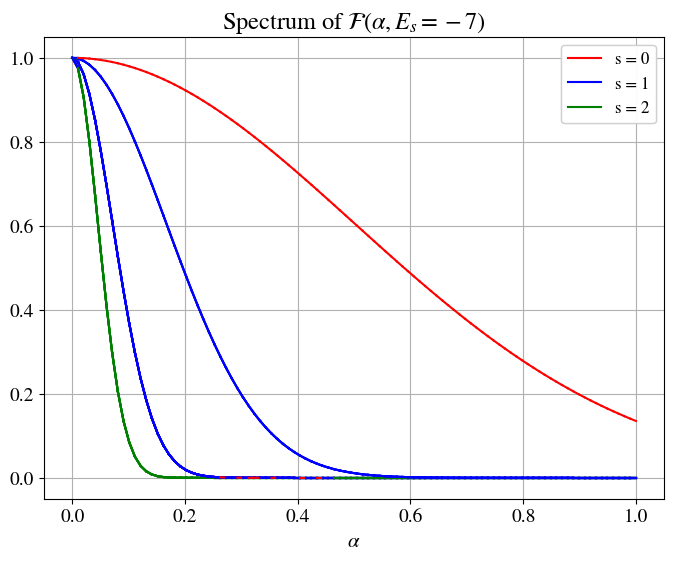

In [5]:
VTA_type = 'exact'
log = False
ranking = 'spin' # can rank according to 'energy', 'modulus', or 'spin'

α_start = 0
α_end = 1
α_steps = 100

# function will perform sweeps over Es
Es_start = -7
Es_end = -7
Es_gradation = 1

k_start = 0
k_end = 15
k_steps = 1

Δ = 0
r = 1

loc = None # 'best' #(0.575, 0.55)
loc_spin = 'best' # 'upper right'# (0.75, 0.5)

asymptotes = True
ncol = 4
fontsize = 12
savefile = True
return_op_list = True

F_list = sweep_spectra(
            VTA_type, log, N_qubits, Jx, Jy, Jz, periodic_bc, \
            α_start, α_end, α_steps, \
            Es_start, Es_end, Es_gradation, \
            ranking, k_start, k_end, k_steps, asymptotes, \
            tolerance, data_directory, Δ = Δ, r = r, fontsize = fontsize, \
            ncol = ncol, loc = loc, loc_spin = loc_spin, \
            return_op_list = return_op_list, savefile = savefile)

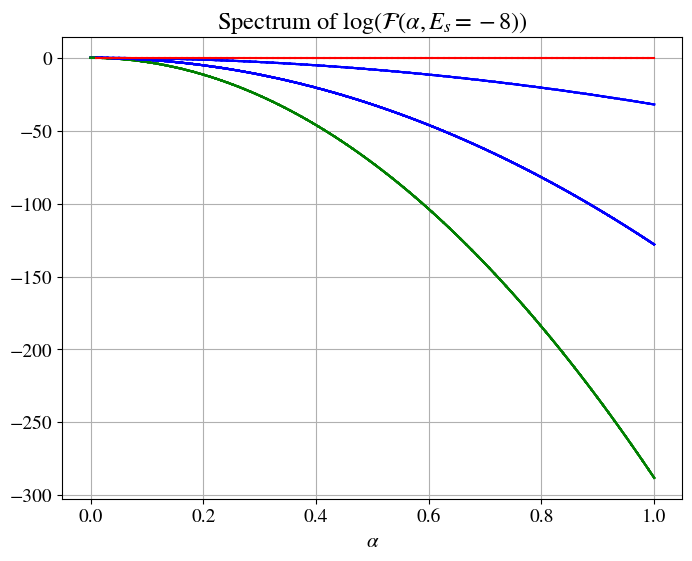

In [8]:
log = True
Es_start = -8
Es_end = -8
Es_gradation = 1

log_F_list = sweep_spectra( 
                 VTA_type, log, N_qubits, Jx, Jy, Jz, periodic_bc, \
                 α_start, α_end, α_steps, \
                 Es_start, Es_end, Es_gradation, \
                 ranking, k_start, k_end, k_steps, asymptotes, \
                 tolerance, data_directory, Δ = Δ, r = r, fontsize = fontsize, \
                 ncol = ncol, loc = loc, loc_spin = None, \
                 return_op_list = False, savefile = True)

/Users/lukebell/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


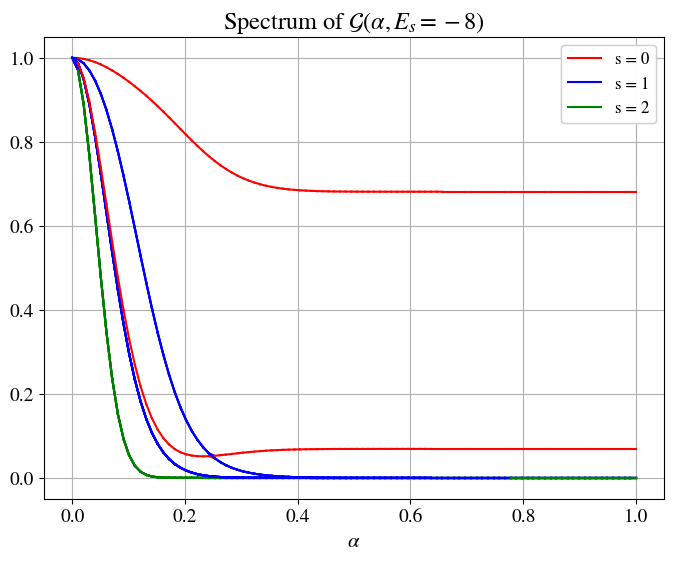

In [9]:
VTA_type = 'approximate'
log = False
Es_start = -8
Es_end = -8
Es_gradation = 1

G_list = VTA_analytics.sweep_spectra(
            VTA_type, log, N_qubits, Jx, Jy, Jz, periodic_bc, \
            α_start, α_end, α_steps, \
            Es_start, Es_end, Es_gradation, \
            ranking, k_start, k_end, k_steps, asymptotes, \
            tolerance, data_directory, Δ = Δ, r = r, fontsize = fontsize, \
            ncol = ncol, loc = loc, loc_spin = loc_spin, \
            return_op_list = return_op_list, savefile = savefile)

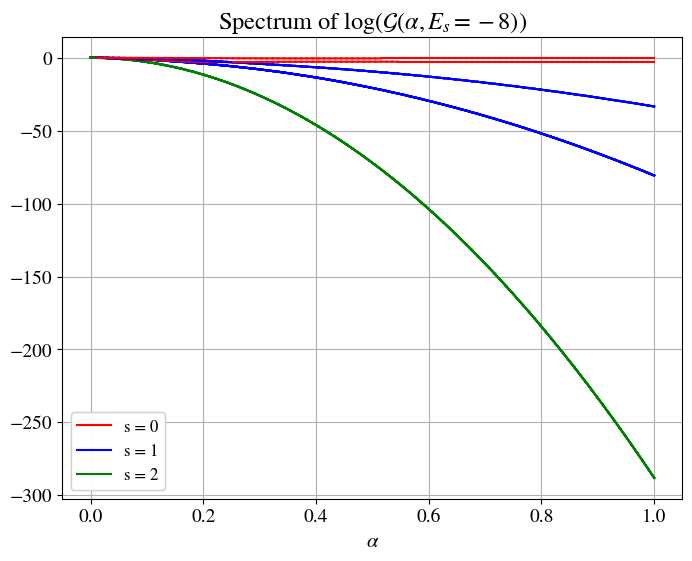

In [10]:
VTA_type = 'approximate'
log = True
Es_start = -8
Es_end = -8

log_G_list = VTA_analytics.sweep_spectra(
            VTA_type, log, N_qubits, Jx, Jy, Jz, periodic_bc, \
            α_start, α_end, α_steps, \
            Es_start, Es_end, Es_gradation, \
            ranking, k_start, k_end, k_steps, asymptotes, \
            tolerance, data_directory, Δ = Δ, r = r, fontsize = fontsize, \
            ncol = ncol, loc = loc, loc_spin = loc_spin, \
            return_op_list = return_op_list, savefile = savefile)